In [ ]:
pip install --upgrade gensim

In [31]:
import nltk
import pandas as pd
from gensim.models import Word2Vec

file = open("/content/train.txt", 'r')
lines = file.readlines()
list_word = []
for l in lines:
    list_word.append(l.split(" "))
# train model

model_sg = Word2Vec(list_word,min_count=1, sg=1)
words_sg = list(model_sg.wv.vocab)
print(words_sg)
model_sg.save('model_sg.bin')
# load model
new_model_sg = Word2Vec.load('model_sg.bin')
# print(new_model_sg)

['', 'musharraf', 's', 'last', 'act', 'desperate', 'to', 'hold', 'onto', 'power', 'pervez', 'has', 'discarded', 'pakistan', 'constitutional', 'framework', 'and', 'declared', 'a', 'state', 'of', 'emergency', 'his', 'goal', 'stifle', 'the', 'independent', 'judiciary', 'free', 'media', 'artfully', 'though', 'shamelessly', 'he', 'tried', 'sell', 'this', 'action', 'as', 'an', 'effort', 'bring', 'about', 'stability', 'help', 'fight', 'war', 'on', 'terror', 'more', 'effectively', 'nothing', 'could', 'be', 'further', 'from', 'truth', 'if', 'history', 'is', 'any', 'indicator', 'decision', 'impose', 'martial', 'law', 'may', 'prove', 'proverbial', 'straw', 'that', 'breaks', 'camel', 'back', 'general', 'appeared', 'national', 'scene', 'october', 'one', 'two', 'nine', 'when', 'ousted', 'elected', 'government', 'announced', 'ambitious', 'nation', 'building', 'project', 'many', 'pakistanis', 'disillusioned', 'with', 'political', 'class', 'remained', 'mute', 'thinking', 'might', 'deliver', 'september'

In [33]:
lst= ['the', 'my', 'you', 'hello', 'just']
most_similar_sg = [model_sg.wv.most_similar(i) for i in lst]
for i in most_similar_sg:
  print(i)

[('in', 0.9997444152832031), ('and', 0.999728798866272), ('to', 0.9997009038925171), ('s', 0.999689519405365), ('of', 0.9996790289878845), ('army', 0.9996591806411743), ('his', 0.9996466040611267), ('at', 0.9996351003646851), ('security', 0.9996224641799927), ('country', 0.9996201992034912)]
[('at', 0.9994812607765198), ('kosovo', 0.9994357824325562), ('with', 0.9994285702705383), ('s', 0.9994054436683655), ('al', 0.9994043707847595), ('was', 0.9994003772735596), ('which', 0.9993897676467896), ('his', 0.9993886947631836), ('ayman', 0.9993875026702881), ('russia', 0.999376118183136)]
[('cdms', 0.4040732979774475), ('combinatorial', 0.3908853530883789), ('amnesia', 0.37360531091690063), ('perm', 0.36154401302337646), ('tributaries', 0.3585595488548279), ('destabilized', 0.3573352098464966), ('machined', 0.35261574387550354), ('available', 0.3524135947227478), ('chains', 0.3519773483276367), ('bahamas', 0.3493364155292511)]
[('ottomanism', 0.4117164611816406), ('dehumanizing', 0.375839829

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


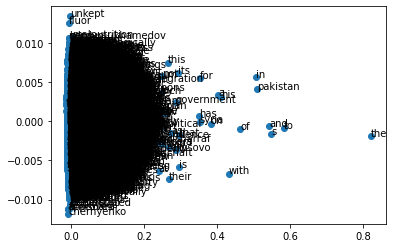

In [34]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

X = model[model_sg.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_sg.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


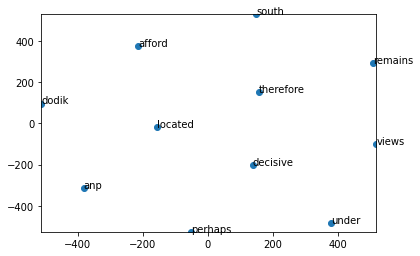

In [35]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
  arr = np.empty((0,size), dtype='f')
  word_labels = [word]

  close_words = model.similar_by_word(word)
  arr = np.append(arr, np.array([model[word]]), axis=0)
  for wrd_score in close_words:
    wrd_vector = model.wv.__getitem__([wrd_score[0]])
    word_labels.append(wrd_score[0])
    arr = np.append(arr, wrd_vector, axis=0)

  tsne = TSNE(n_components = 2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(arr)

  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  plt.scatter(x_coords, y_coords)

  for label, x, y in zip(word_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')

  plt.xlim(x_coords.min()+0.00005,x_coords.max()+0.00005 )
  plt.ylim(y_coords.min()+0.00005,y_coords.max()+0.00005 )
  plt.show()

display_closestwords_tsnescatterplot(model_sg, 'therefore', 100)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


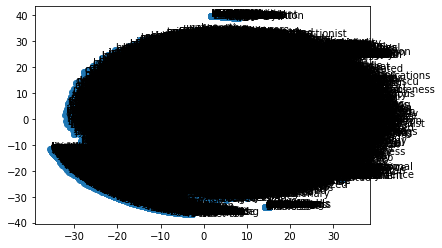

In [36]:
# Import required libraries
import numpy as np
import pandas as pd 
import nltk
from gensim.models import Word2Vec, KeyedVectors, word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gensim
%matplotlib inline

def tsneGraph(model):
  X = model[model_sg.wv.vocab]
  tsne = TSNE(n_components=2)
  result = tsne.fit_transform(X)
  # create a scatter plot of the projection
  plt.scatter(result[:, 0], result[:, 1])
  words = list(model_sg.wv.vocab)
  for i, word in enumerate(words):
  	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
  plt.show()

tsneGraph(model_sg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


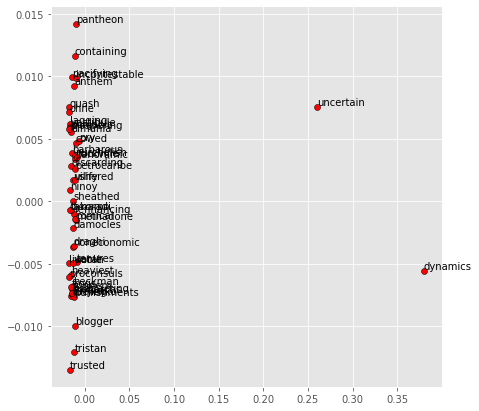

In [52]:
def display_pca_scatterplot(model, words=None, sample=0):
  if words==None:
    if sample > 0:
      words = np.random.choice(list(model.wv.vocab), sample)
    else:
      words = [word for word in model.wv.vocab]

    word_vectors = np.array([model[w] for w in words])
    twodium = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(7,7))
    plt.scatter(twodium[:,0], twodium[:,1], edgecolors='k', c='r')

    for word, (x,y) in zip(words, twodium):
      plt.text(x+0.0001, y+0.0001, word)
    plt.show()

display_pca_scatterplot(model_sg, sample=50)